In [1]:
from importer_snippets import load_experiment
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('JGW')

# Impedance fitting package: https://impedancepy.readthedocs.io/en/latest/index.html
from impedance.models.circuits import CustomCircuit
from impedance.preprocessing import ignoreBelowX
from impedance.visualization import plot_nyquist
from impedance.validation import linKK, eval_linKK

In [2]:
EIS = load_experiment()

In [3]:
Zseries = EIS.data['Zre'] + 1j*EIS.data['Zim']
f, Z = EIS.data['f'].to_numpy(), Zseries.to_numpy()
n = 0
for i in Z:
    if np.real(i) < 0 or -np.imag(i) < 0:
        n += 1
print(str(n)+' improperly signed impedances have been excluded')
f, Z = ignoreBelowX(f, Z)

0 improperly signed impedances have been excluded


In [4]:
circuit = 'R1-p(R2-W1,C1)'
initial_guess = [530, 450, 100, 10.0e-6]
circuit = CustomCircuit(circuit, initial_guess=initial_guess)
circuit.fit(f, Z)
fit = circuit.predict(np.linspace(f[0], f[-1], 10000))

# Check the fit
# print(circuit)
# circuit.plot(ax=ax) # Get some other fit plots

In [5]:
def save_Nyq_fig(fig, analyte, electrode, solvent, notebook):
    ans = input('Save the figure?')
    if ans in ['y', 'yes', 'Yes', 'yeye', 'yeah', 'why, certainly', True]:
        fig.savefig("C:\\Users\\jgage\\Documents\GitHub\\CHEM274\\data\\figs\\Nyq_"+
            analyte + electrode + solvent + notebook+'.jpg')
        print('Saved')
    else:
        print('Not saved')

In [8]:
# Schönleber, M.; Klotz, D.; Ivers-Tiffée, E. A Method for Improving the Robustness of Linear Kramers-Kronig Validity Tests. Electrochim. Acta 2014, 131, 20–27. doi.org/10.1016/j.electacta.2014.01.034.
M, mu, Z_linKK, res_real, res_imag = linKK(f, Z, c=.5, max_M=100, fit_type='complex', add_cap=True)

print('\nCompleted Lin-KK Fit\nM = {:d}\nmu = {:.2f}'.format(M, mu))

print(np.real(Z_linKK), np.imag(Z_linKK))

10 0.9844501077560042 15.734995752452699

Completed Lin-KK Fit
M = 13
mu = 0.86
[ 506.38388602  506.21638454  514.11276184  527.14569285  554.41299548
  618.07967726  709.0042936   807.06558167  903.67035615  986.61115723
 1077.63308202 1176.23069555 1302.84898422 1479.71997295 1682.96600918
 2022.6899629 ] [ -28.89911274  -30.87392938  -43.42222229  -66.45201316 -108.97517232
 -160.20802232 -192.52002995 -208.83298222 -212.288456   -222.34324296
 -254.39886531 -304.01666204 -399.43463625 -511.85184648 -687.55887533
 -920.97763465]


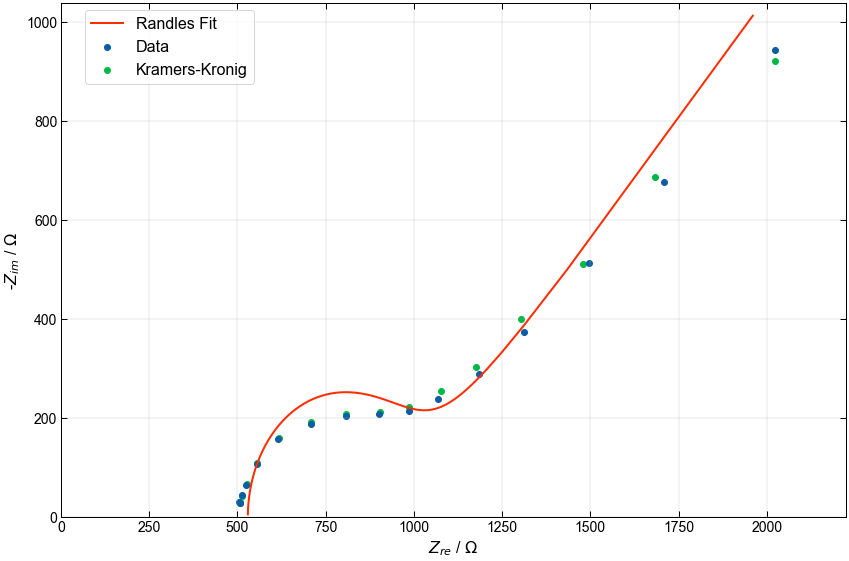

Not saved


In [9]:
# Nyquist
fig = plt.figure()
ax = fig.add_subplot()

# ax.set_title('Nyquist Plot')

ax.scatter(EIS.data['Zre'], -EIS.data['Zim'], label = 'Data') # Plot experimental data
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
ax.set_xlabel('$Z_{re}$ / $\Omega$')
ax.set_ylabel('-$Z_{im}$ / $\Omega$')
ax.set_xlim ([0,1.1*max(EIS.data['Zre'])])
ax.set_ylim ([0,1.1*max(-EIS.data['Zim'])])
ax.plot(np.real(fit), -np.imag(fit), label='Randles Fit', color='C1') # Plot circuit fit
ax.scatter(np.real(Z_linKK), -np.imag(Z_linKK), label='Kramers-Kronig', color='C2', zorder=0) # Plot LinKK result


fig.tight_layout()
fig.legend(loc=(.1, .85))

analyte = 'Feacac_'
electrode = 'GC_'
solvent = 'MeCN_'
notebook = '_P-03-04'

plt.show()
# save_Nyq_fig(fig, analyte, electrode, solvent, notebook)